In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
files.upload()

Saving train.csv to train (6).csv


{'train.csv': b'id,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose,TenYearCHD\r\n0,64,2,0,1,3,0,0,0,0,221,148,85,,90,80,1\r\n1,36,4,1,0,0,0,0,1,0,212,168,98,29.77,72,75,0\r\n2,46,1,0,1,10,0,0,0,0,250,116,71,20.35,88,94,0\r\n3,50,1,1,1,20,0,0,1,0,233,158,88,28.26,68,94,1\r\n4,64,1,0,1,30,0,0,0,0,241,136.5,85,26.42,70,77,0\r\n5,61,3,0,0,0,0,0,1,0,272,182,121,32.8,85,65,1\r\n6,61,1,1,0,0,0,0,1,0,238,232,136,24.83,75,79,0\r\n7,36,4,1,1,35,0,0,0,0,295,102,68,28.15,60,63,0\r\n8,41,2,0,1,20,,0,0,0,220,126,78,20.7,86,79,0\r\n9,55,2,0,0,0,0,0,1,0,326,144,81,25.71,85,,0\r\n10,61,1,0,0,0,0,0,1,0,,185,121,35.22,80,,0\r\n11,53,2,0,0,0,0,0,0,0,210,138,86.5,22.49,88,87,0\r\n12,43,2,0,0,0,0,0,0,0,213,96,62,19.38,74,80,0\r\n13,44,1,1,1,40,0,0,0,0,227,146.5,97,26.92,80,67,0\r\n14,58,3,0,0,0,0,0,1,0,188,160,120,35.58,88,85,0\r\n15,51,1,1,1,15,0,0,0,0,212,146,89,24.49,100,132,1\r\n16,50,1,0,0,0,0,0,1,0,240,163,105,31.37,89,75,0

In [3]:
df = pd.read_csv('train.csv')
df

,id,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [4]:
df.head()

,id,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.tail()

,id,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,0,0,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
df.sample(10)

,id,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose,TenYearCHD
1079,1079,46,1.0,1,1,40.0,0.0,0,0,0,210.0,154.0,91.0,26.25,88.0,82.0,0
2217,2217,63,1.0,0,0,0.0,0.0,0,1,0,258.0,166.0,92.0,26.91,75.0,NaN,0
1208,1208,63,1.0,0,0,0.0,0.0,0,0,0,219.0,124.0,75.0,28.57,66.0,76.0,0
2804,2804,49,4.0,1,0,0.0,0.0,0,0,0,264.0,127.5,81.0,25.16,76.0,70.0,0
595,595,62,3.0,0,0,0.0,0.0,0,1,0,249.0,176.0,89.0,24.49,75.0,81.0,0
118,118,48,2.0,1,1,17.0,0.0,0,0,0,218.0,113.0,79.0,27.33,62.0,73.0,0
2296,2296,60,4.0,0,1,20.0,0.0,0,1,0,352.0,149.0,73.0,25.96,80.0,79.0,0
2676,2676,39,1.0,1,1,20.0,0.0,0,0,0,232.0,122.5,78.5,26.11,80.0,73.0,0
3018,3018,64,2.0,0,0,0.0,0.0,0,1,0,254.0,196.0,119.0,35.22,100.0,79.0,0
1111,1111,53,1.0,1,1,30.0,0.0,0,0,0,253.0,121.0,85.5,28.52,80.0,68.0,0


In [7]:
df.shape

(3390, 17)

In [8]:
df.isnull()

,id,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3388,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_s1oking           0
cigsPerDay          22
BP1eds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
B1I                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
df.isnull().sum().sum()

510

In [11]:
#Filling null values with the next values
df = df.fillna(method = 'bfill')
df

,id,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_s1oking       3390 non-null   int64  
 5   cigsPerDay       3390 non-null   float64
 6   BP1eds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  B1I              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [14]:
df.describe()

,id,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.968437,0.432743,0.497640,9.059882,0.029499,0.006490,0.315339,0.025664,237.180826,132.60118,82.883038,25.795752,75.979351,82.105015,0.150737
std,978.753033,8.592878,1.018510,0.495529,0.500068,11.867853,0.169224,0.080309,0.464719,0.158153,45.393367,22.29203,12.023581,4.117931,11.970710,24.256684,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [15]:
# Show the value of the target column

df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [16]:
#drop the id column

df = df.drop(['id'],axis = 1)
df

,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [17]:
df. corr()

,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose,TenYearCHD
age,1.000000,-0.168069,-0.041882,-0.210997,-0.192300,0.122114,0.059038,0.308826,0.107875,0.274432,0.404845,0.221896,0.135939,-0.002304,0.097185,0.224927
education,-0.168069,1.000000,0.027071,0.026214,0.008627,-0.018564,-0.033570,-0.082451,-0.048093,-0.015398,-0.132049,-0.057226,-0.127445,-0.043181,-0.030979,-0.054948
sex,-0.041882,0.027071,1.000000,0.215485,0.330109,-0.043191,-0.011273,0.003072,0.008853,-0.072992,-0.037369,0.058840,0.086664,-0.118475,-0.003463,0.084647
is_s1oking,-0.210997,0.026214,0.215485,1.000000,0.767122,-0.037533,-0.043703,-0.119325,-0.053333,-0.048656,-0.145721,-0.124318,-0.173472,0.062347,-0.054615,0.034143
cigsPerDay,-0.192300,0.008627,0.330109,0.767122,1.000000,-0.036436,-0.041894,-0.080253,-0.048768,-0.026694,-0.101341,-0.070060,-0.102392,0.066327,-0.067001,0.066242
BP1eds,0.122114,-0.018564,-0.043191,-0.037533,-0.036436,1.000000,0.116183,0.256892,0.070932,0.076323,0.260384,0.198780,0.087310,0.018072,0.052296,0.087349
prevalentStroke,0.059038,-0.033570,-0.011273,-0.043703,-0.041894,0.116183,1.000000,0.071652,0.010115,-0.010925,0.057568,0.047235,0.012102,-0.019197,0.021159,0.068627
prevalentHyp,0.308826,-0.082451,0.003072,-0.119325,-0.080253,0.256892,0.071652,1.000000,0.082565,0.158602,0.699285,0.612897,0.299013,0.151014,0.075354,0.166544
diabetes,0.107875,-0.048093,0.008853,-0.053333,-0.048768,0.070932,0.010115,0.082565,1.000000,0.058170,0.124011,0.061165,0.093220,0.039712,0.576862,0.103681
totChol,0.274432,-0.015398,-0.072992,-0.048656,-0.026694,0.076323,-0.010925,0.158602,0.058170,1.000000,0.197198,0.150472,0.111994,0.087034,0.053893,0.092072


Negative (0):  2879
Positive (0):  511


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


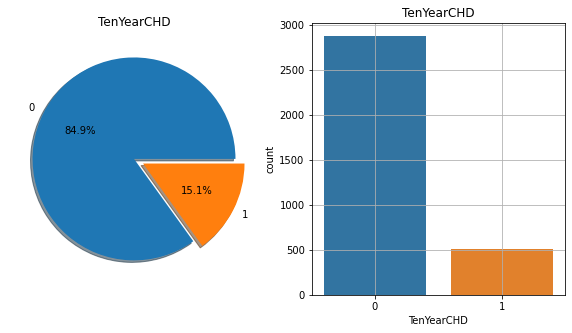

In [18]:
# Count plot of TenYearCHD data

f, ax=plt.subplots(1,2,figsize=(10,5))
df['TenYearCHD'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('')
sb.countplot('TenYearCHD', data=df, ax=ax[1])
ax[1].set_title('TenYearCHD')
N,P = df['TenYearCHD'].value_counts()
print('Negative (0): ', N)
print('Positive (0): ', P)
plt.grid()
plt.show()

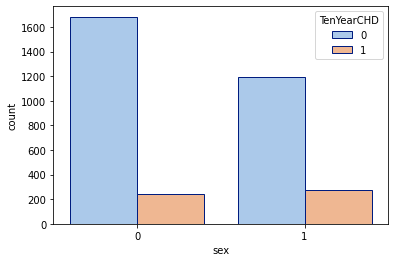

In [19]:
# Visualize disease rate subjectedly gender

sb.countplot(x='sex',hue='TenYearCHD',data=df,palette='pastel',edgecolor=sb.color_palette('dark',n_colors=1))

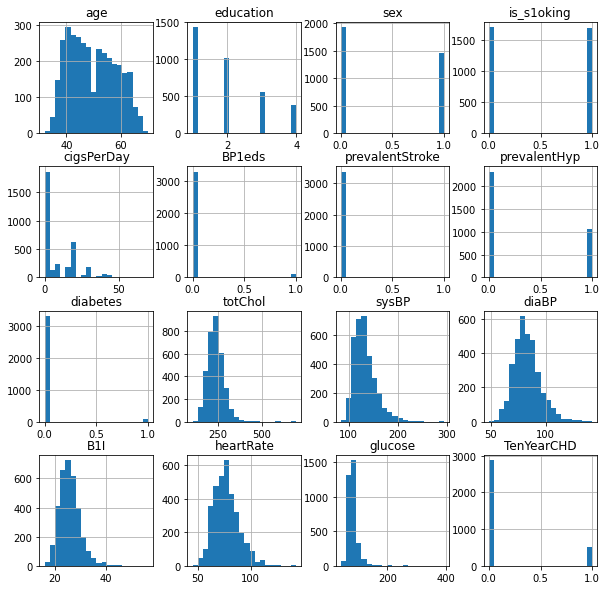

In [20]:
# Histogram of columns

df.hist(bins=20,figsize=(10,10))
plt.show()

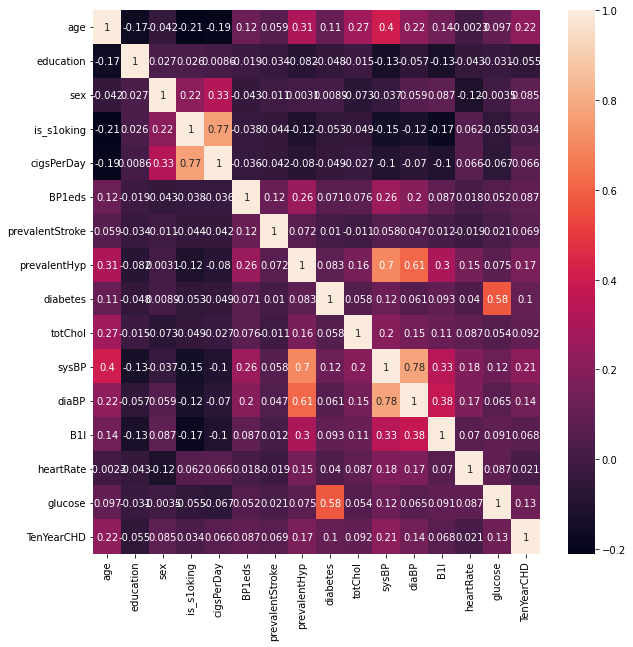

In [21]:
# Correlation analysis
corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g = sb.heatmap(df[top_corr_features].corr(), annot=True)

In [22]:
target_name='TenYearCHD'

# Separate object for target feature
y = df[target_name]

# Separate object for input feature
x = df.drop(target_name, axis=1)

In [23]:
x.head()

,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0


In [24]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [26]:
x_train

,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose
2016,51,3.0,0,0,0.0,0.0,0,0,0,214.0,139.0,93.0,29.80,67.0,82.0
3052,36,3.0,0,0,0.0,0.0,0,1,0,264.0,123.0,94.5,28.59,75.0,70.0
2790,45,1.0,0,0,0.0,0.0,0,0,0,285.0,107.5,80.0,28.06,74.0,80.0
3009,42,4.0,1,0,0.0,0.0,0,0,0,225.0,110.0,73.0,27.67,65.0,65.0
134,64,1.0,0,0,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,39,2.0,0,0,0.0,0.0,0,1,0,226.0,146.0,86.0,24.41,85.0,85.0
905,45,3.0,1,0,0.0,0.0,0,0,0,185.0,108.0,70.0,20.50,60.0,87.0
1096,48,3.0,0,0,0.0,0.0,0,1,0,205.0,140.0,99.0,24.41,100.0,92.0
235,40,1.0,0,1,5.0,0.0,0,0,0,209.0,130.0,84.5,39.94,77.0,104.0


In [27]:
y_train

2016    0
3052    0
2790    0
3009    0
134     0
       ..
2763    0
905     0
1096    0
235     1
1061    0
Name: TenYearCHD, Length: 2373, dtype: int64

In [28]:
x_test

,age,education,sex,is_s1oking,cigsPerDay,BP1eds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,B1I,heartRate,glucose
2109,49,1.0,1,1,2.0,0.0,0,1,0,255.0,143.5,81.0,25.65,75.0,80.0
2938,59,4.0,1,1,20.0,0.0,0,1,0,265.0,155.0,85.0,27.06,88.0,75.0
1363,52,2.0,1,0,0.0,0.0,0,0,0,310.0,135.0,89.0,29.51,64.0,74.0
254,52,1.0,0,0,0.0,0.0,0,0,0,197.0,129.0,83.0,32.57,65.0,76.0
2043,55,1.0,1,1,30.0,0.0,0,0,0,175.0,150.0,88.0,22.72,56.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,54,1.0,1,1,20.0,0.0,0,1,0,225.0,133.0,83.0,22.18,80.0,65.0
2256,45,3.0,0,1,3.0,0.0,0,0,0,152.0,118.5,76.0,25.38,74.0,68.0
2238,62,1.0,0,0,0.0,0.0,0,1,0,282.0,175.0,79.0,28.24,57.0,67.0
2291,45,3.0,0,1,8.0,0.0,0,0,0,195.0,111.0,79.0,23.22,86.0,85.0


In [29]:
y_test

2109    0
2938    0
1363    1
254     0
2043    1
       ..
228     0
2256    0
2238    0
2291    0
302     0
Name: TenYearCHD, Length: 1017, dtype: int64

Random Forest Algorithm

In [30]:
from sklearn. ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
print("Train Accuracy of Random Forest Algorithm ", rf.score(x_train,y_train)*100)
print("Test Accuracy score of Random Forest Algorithm ", rf.score(x_test,y_test)*100)

Train Accuracy of Random Forest Algorithm  100.0
Test Accuracy score of Random Forest Algorithm  85.15240904621436


Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
print("Train Accuracy of Decision Tree Algorithm ", dt.score(x_train,y_train)*100)
print("Test Accuracy score of Decision Tree Algorithm ", dt.score(x_test,y_test)*100)

Train Accuracy of Decision Tree Algorithm  100.0
Test Accuracy score of Decision Tree Algorithm  76.8928220255654


Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [35]:
print("Train Accuracy of Logistic Regression ", lr.score(x_train,y_train)*100)
print("Test Accuracy score of Logistic Regression ", lr.score(x_test,y_test)*100)

Train Accuracy of Logistic Regression  85.41930046354825
Test Accuracy score of Logistic Regression  86.13569321533923


K-Nearest Neighbor(KNN)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
print("Train Accuracy of KNN Algorithm ", knn.score(x_train,y_train)*100)
print("Test Accuracy score of KNN Algorithm ", knn.score(x_test,y_test)*100)

Train Accuracy of KNN Algorithm  86.47281921618205
Test Accuracy score of KNN Algorithm  84.16912487708947


Naive-Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [39]:
print("Train Accuracy of Naive-Bayes Algorithm ", nb.score(x_train,y_train)*100)
print("Test Accuracy score of Naive-Bayes Algorithm ", nb.score(x_test,y_test)*100)

Train Accuracy of Naive-Bayes Algorithm  82.25874420564686
Test Accuracy score of Naive-Bayes Algorithm  82.79252704031465


SVM

In [40]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train, y_train)

SVC()

In [41]:
print("Train Accuracy of SVM Algorithm ", svm.score(x_train,y_train)*100)
print("Test Accuracy score of SVM Algorithm ", svm.score(x_test,y_test)*100)

Train Accuracy of SVM Algorithm  84.78718921196797
Test Accuracy score of SVM Algorithm  85.25073746312685


Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
lrr=LinearRegression()
lrr.fit(x_train,y_train)

LinearRegression()

In [43]:
print("Train Accuracy of Linear Regression Algorithm ", lrr.score(x_train,y_train)*100)
print("Test Accuracy score of Linear Regression Algorithm ", lrr.score(x_test,y_test)*100)

Train Accuracy of Linear Regression Algorithm  8.920447513893537
Test Accuracy score of Linear Regression Algorithm  12.161629801715023


## Predicitng Outcome

In [44]:
# Prediction on test using random forest

rf_pred = rf.predict(x_test)

In [45]:
# Prediction on test using decision tree

dt_pred = dt.predict(x_test)

In [46]:
# Prediction on test using logistic regression

lr_pred = lr.predict(x_test)

In [47]:
# Prediction on test using KNN

knn_pred = knn.predict(x_test)

In [48]:
# Prediction on test using naive bayes

nb_pred = nb.predict(x_test)

In [49]:
# Prediction on test using SVM

svm_pred = svm.predict(x_test)

In [50]:
# Prediction on test using linear regression

lrr_pred = lrr.predict(x_test)

## Confusion Matrix

Random Forest

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, rf_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 857
FP 10
FN 141
TP 9
Accuracy rate 85.15240904621436
Misclassification rate 14.847590953785645


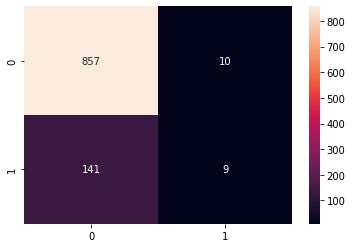

In [52]:
sb.heatmap(confusion_matrix(y_test, rf_pred), annot=True,fmt="d")

Decision Tree Algorithm

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, dt_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 746
FP 121
FN 114
TP 36
Accuracy rate 76.8928220255654
Misclassification rate 23.107177974434613


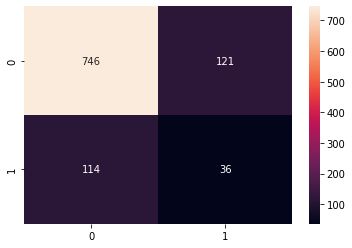

In [54]:
sb.heatmap(confusion_matrix(y_test, dt_pred), annot=True,fmt="d")

Logistic Regression Algorithm

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, lr_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 865
FP 2
FN 139
TP 11
Accuracy rate 86.13569321533923
Misclassification rate 13.864306784660767


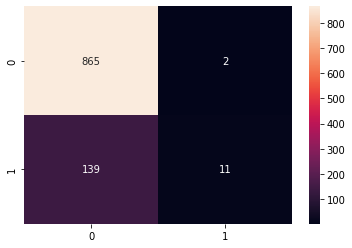

In [56]:
sb.heatmap(confusion_matrix(y_test, lr_pred), annot=True,fmt="d")

K-Nearest Neighbor(KNN) Algorithm

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, knn_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 841
FP 26
FN 135
TP 15
Accuracy rate 84.16912487708947
Misclassification rate 15.83087512291052


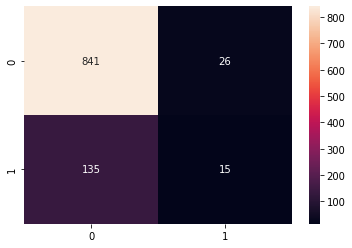

In [58]:
sb.heatmap(confusion_matrix(y_test, knn_pred), annot=True,fmt="d")

Naive-Bayes Algorithm

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, nb_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 804
FP 63
FN 112
TP 38
Accuracy rate 82.79252704031465
Misclassification rate 17.20747295968535


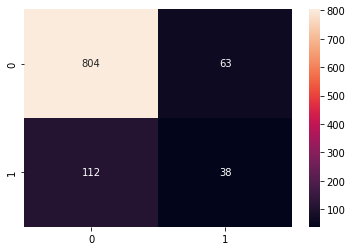

In [60]:
sb.heatmap(confusion_matrix(y_test, nb_pred), annot=True,fmt="d")

SVM Algorithm

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, svm_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 867
FP 0
FN 150
TP 0
Accuracy rate 85.25073746312685
Misclassification rate 14.749262536873156


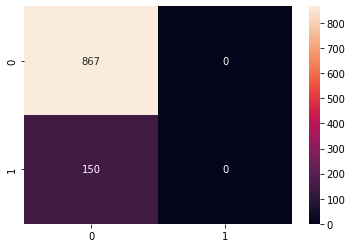

In [62]:
sb.heatmap(confusion_matrix(y_test, svm_pred), annot=True,fmt="d")